In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = (\log{Z_{n}-p_{1}}*(-Z_{n-1}))^{(Z_{n}^{2/3}-p_{2}*(-Z_{n-2})^(Z_{n}^{2/3}))^{e^({Z_{n}+Z_{n-1}+Z_{n-2}}})}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# beetle-ish figure: a numerical discovery.

    Using initial values (in addition to vector-point Z):
    p = [-1.8721 -5.9294]
    Zm1 = p(1)            Zm2 = p(2)
    Sequential iteration (on the complex plane) of difference equation:
    
        tmp = Z;          tmp1 = Zm1;
        x = (-Z)^(3/2);
        Z = log(Z - p(1)*(-Zm1))^(x - p(2)*(-Zm2)^p)^exp(Z + Zm1 + Zm2);
        Zm1 = tmp;        Zm2 = tmp1;
    
    produces a buggish figure.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def beetleish(Z, p, Z0=None, ET=None, Zm1=0, Zm2=0):
    """ Z, Zm1, Zm2 = beetleish(Z, p, Z0=None, ET=None, Zm1=0, Zm2=0)
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    if ET is None or ET == 0:
        Zm1 = p[0]
        Zm2 = p[1]
    tmp = Z
    tmp1 = Zm1
    x = (-Z)**(3/2)
    Z = (np.log( Z - p[0]*(-Zm1) )**( x - p[1]*(-Zm2)**x ))**np.exp(Z + Zm1 + Zm2)
    Zm1 = tmp
    Zm2 = tmp1
    return Z, Zm1, Zm2

In [4]:
#                                        -- machine with 8 cores --
par_set = {'n_rows': 600, 'n_cols': 800}
par_set['center_point'] = -0.6 + 0.0j
par_set['theta'] = -np.pi/2
par_set['zoom'] = 0.9

par_set['it_max'] = 1024
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
par_set['delete_temp_dir'] = True
par_set['eq_order'] = 2

p_ho = [-1.8721, -5.9294]
list_tuple = [(beetleish, (p_ho))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

3.2267510890960693 	 total time
converstion time =	 0.7436599731445312


coloring time =	 2.148975133895874


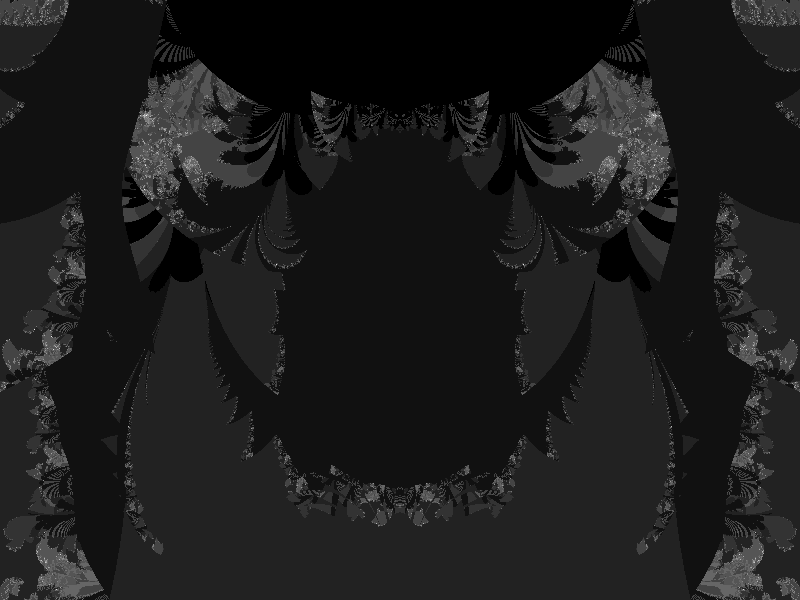

In [5]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 2.192596912384033


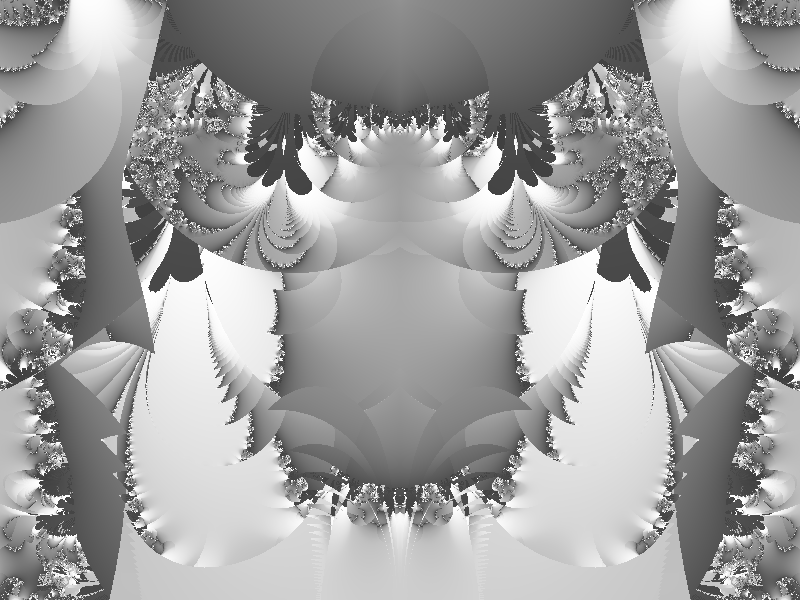

In [6]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 2.1570072174072266


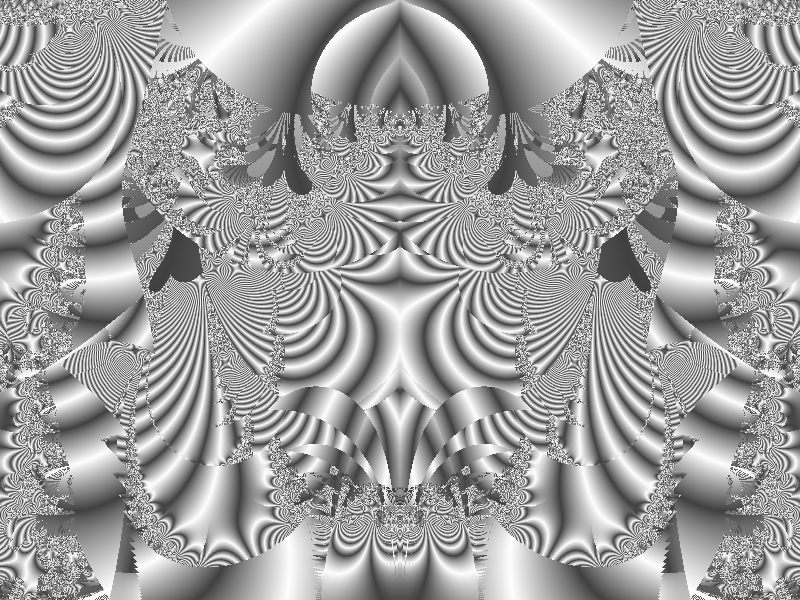

In [7]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 4.716724872589111


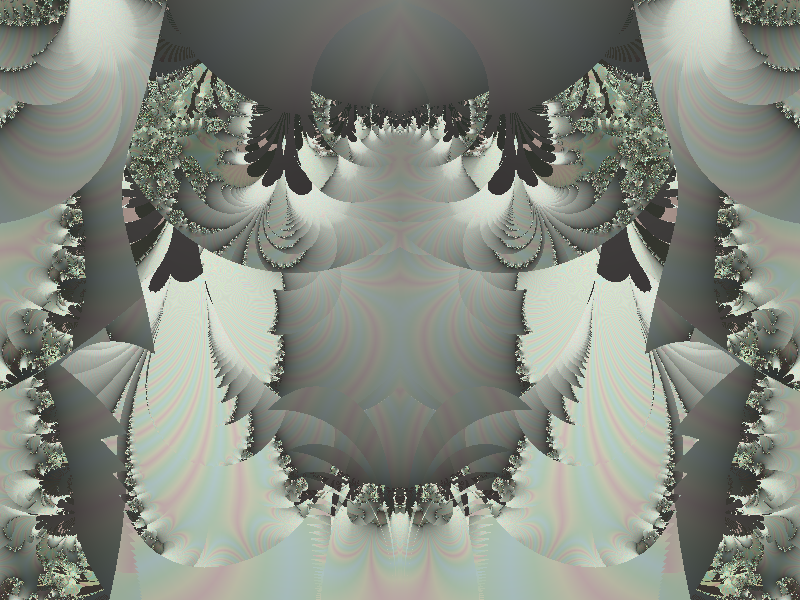

In [8]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = ncp.graphic_norm(Zr)
S = ncp.graphic_norm(ET)
V = ncp.graphic_norm(Zd)

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 4.734538793563843


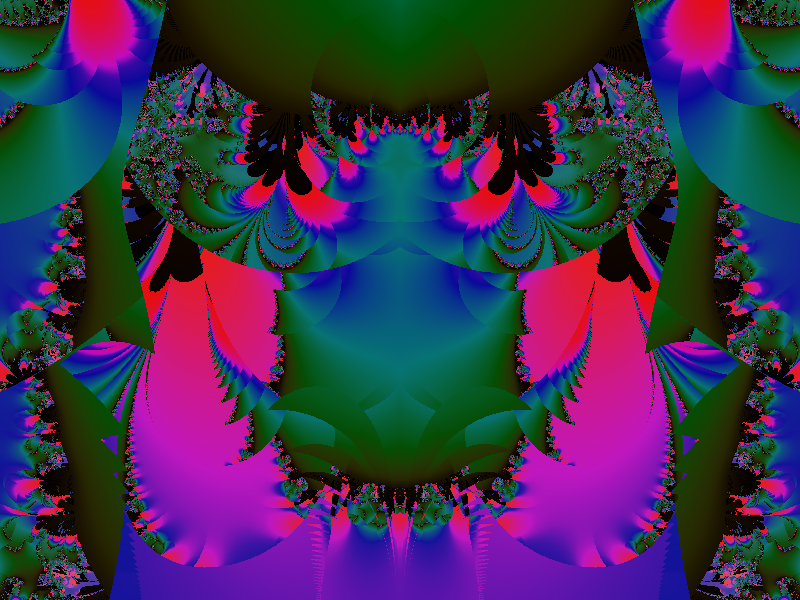

In [9]:
#                  Rotation > Hue, Escape Time > Saturation, Distance > Value (no significantly muted)
H = ncp.graphic_norm(Zd)
S = 1 - ncp.graphic_norm(ET)
V = ncp.graphic_norm(Zd)

Hue_width = 1.0
H_min = 0.0
H_max = H_min+Hue_width

S_max = 1.0
S_min = 0.1

V_max = 0.9
V_min = 0.0
t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(I)

In [10]:
#                                        smaller -> view individual escape time sets
par_set = {'n_rows': 200, 'n_cols': 300}
par_set['center_point'] = -0.6 + 0.0j
par_set['theta'] = -np.pi/2
par_set['zoom'] = 0.9

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
par_set['delete_temp_dir'] = True
par_set['eq_order'] = 2

p_ho = [-1.8721, -5.9294]
list_tuple = [(beetleish, (p_ho))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

0.643265962600708 	 total time


ET =	 1


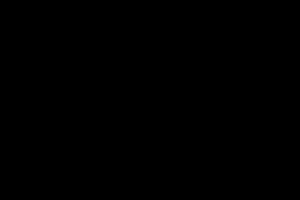

ET =	 2


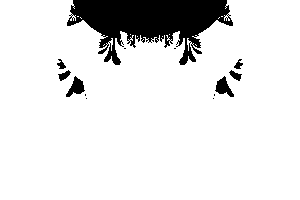

ET =	 3


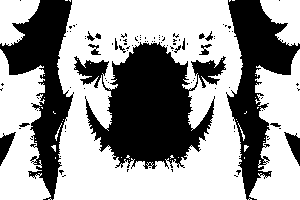

ET =	 4


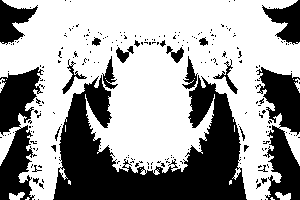

ET =	 5


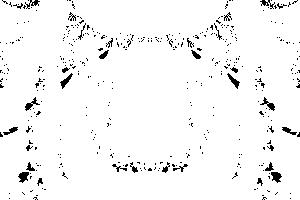

ET =	 6


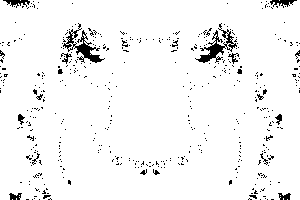

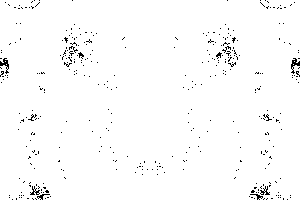

In [11]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [12]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\t',(ET_sm > k).sum())

0 0
1 0
2 6560
3 23576
4 22446
5 2234
6 2670
7 1476
8 578
9 206
10 134
11 68
12 26
13 16
14 2
15 2
16 4
17 0
18 0
19 0

How many never escaped:	 2


In [14]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0_sm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  1.63 95.6 degrees

        2 total unescaped points

   points near V       (plane units)
        1 within V/ 1  (1.630)
        1 within V/ 2  (0.815)
        1 within V/ 3  (0.543)
        1 within V/ 4  (0.407)
        1 within V/ 5  (0.326)
        1 within V/ 6  (0.272)
        1 within V/ 7  (0.233)
        1 within V/ 8  (0.204)
        1 within V/ 9  (0.181)
        1 within V/10  (0.163)
        1 within V/11  (0.148)
